In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append('..')

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append('..')

In [3]:
%load_ext autoreload
%autoreload 2
from solat_cb.simulation import *
from solat_cb.spectra import *
from solat_cb.mle import *

In [4]:
libdir ='/pscratch/sd/l/lonappan/SOLAT'
nside = 1024
cb_method = 'iso'
beta = 0.35
dust = 10
synch = 5
alpha = [-0.1,-0.1,0.2,0.2,.15,.15]
atm_noise = True
nsplits = 2
bandpass = False
fit = "As + Asd + Ad + beta + alpha"
binwidth = 20
bmin = 60
bmax = 2000

In [5]:
lat_wn = LATsky(libdir,nside,cb_method,dust,synch,alpha,beta,atm_noise=False,nsplits=nsplits,bandpass=bandpass)
lat_1f = LATsky(libdir,nside,cb_method,dust,synch,alpha,beta,atm_noise=True,nsplits=nsplits,bandpass=bandpass)
lat_1f_bp = LATsky(libdir,nside,cb_method,dust,synch,alpha,beta,atm_noise=True,nsplits=nsplits,bandpass=True)

CMB : INFO - Loading CMB power spectra from file
Noise : INFO - Noise Model: White noise v3.0.0
CMB : INFO - Loading CMB power spectra from file
Noise : INFO - Noise Model: White + 1/f noise v3.0.0
CMB : INFO - Loading CMB power spectra from file
Noise : INFO - Noise Model: White + 1/f noise v3.0.0


In [6]:
spec_wn = Spectra(lat_wn,cache=True,parallel=1)
spec_1f = Spectra(lat_1f,cache=True,parallel=1)
spec_1f_bp = Spectra(lat_1f_bp,cache=True,parallel=1)
spec_1f_fg = Spectra(lat_1f,cache=True,parallel=1,dust_model=9,sync_model=4)

Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/LAT_white_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/mask_N1024_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLAT/LAT_white_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/coupling_matrix_N1024_fsky0p55_aposcale2p0_CO_PS.fits
Spectra : INFO - Parallelized single loop
Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/LAT_atm_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/mask_N1024_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLAT/LAT_atm_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/coupling_matrix_N1024_fsky0p55_aposcale2p0_CO_PS.fits
Spectra : INFO - Parallelized single loop
Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/LAT_atm_noise_bandpass_2splits/spectra_1024_aposcale2p0_common/workspaces/mask_N1024_aposcale2p0_CO_PS

In [7]:
ml_wn = MLE(libdir,spec_wn,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)
ml_1f = MLE(libdir,spec_1f,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)
ml_1f_rm = MLE(libdir,spec_1f,fit, alpha_per_split=False,rm_same_tube=True,binwidth=binwidth,bmin=bmin,bmax=bmax)
ml_1f_bp = MLE(libdir,spec_1f_bp,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)
ml_1f_fg = MLE(libdir,spec_1f_fg,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Loading CMB power spectra from file


Fitting a common polarisation angle per frequency
Fitting a common polarisation angle per frequency
Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube
Fitting a common polarisation angle per frequency


MLE : WARNING - Special Case Noted: FG model in LATsky and Spectra object are different
CMB : INFO - Loading CMB power spectra from file


Fitting a common polarisation angle per frequency


In [9]:
cases = {}
cases['WN'] = [ml_wn]
cases['1/f_rm'] = [ml_1f_rm]
cases['1/f'] = [ml_1f]
cases['1/f_bp'] = [ml_1f_bp]
cases['1/f_fg'] = [ml_1f_fg]

In [10]:
ms = MultiStat(cases)


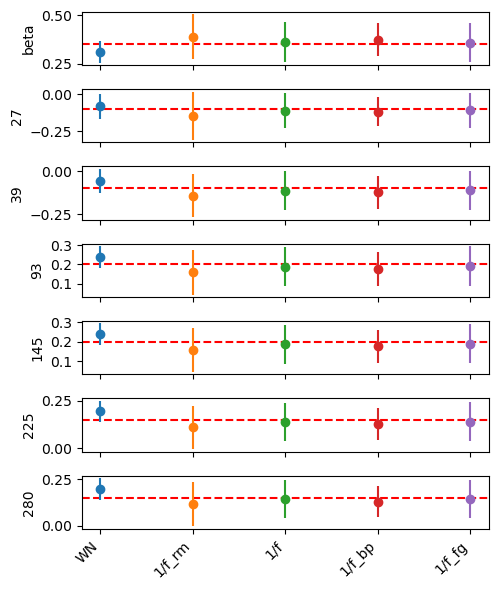

In [11]:
ms.plot()